# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy.optimize as sopt
import matplotlib
import matplotlib.pyplot as plt
import math
import dill

expected = dill.load(open('expected','rb'))

results_bisection = expected['bisection']
f = results_bisection[12][2]
a = results_bisection[12][1]

(0.9165625830854545, 8)
(-1.4551915228366852e-11, 34)


***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

<ipython-input-2-8bb3946f80c4>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()


<AxesSubplot:>

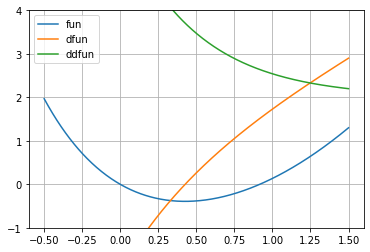

In [2]:
t = np.linspace(-0.5,1.5,500)
plt.plot(t, main.fun(t))
plt.plot(t, main.dfun(t))
plt.plot(t, main.ddfun(t))
plt.legend(['fun','dfun','ddfun'])
plt.ylim([-1,4])
plt.grid()
plt.axes()

***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize

In [3]:
xs1 = sopt.fsolve(main.fun,np.array([-3,3]))
xs2 = sopt.root(main.fun,np.array([-3,3]))
print(xs1,xs2,sep='\n')

[-5.24068933e-16  9.16562583e-01]
    fjac: array([[ 0.32306576, -0.94637652],
       [ 0.94637652,  0.32306576]])
     fun: array([ 1.11022302e-15, -1.77169390e-12])
 message: 'The solution converged.'
    nfev: 26
     qtf: array([-2.50391401e-09,  8.55139485e-10])
       r: array([-6.20117352, -1.43175422,  0.48876002])
  status: 1
 success: True
       x: array([-5.24068933e-16,  9.16562583e-01])


***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

In [4]:
a = 0.5
b = 1.0
epsilon = 1e-10
iteration = 100

xsb = main.bisection(a,b,main.fun,epsilon,iteration)
xss = main.secant(a,b,main.fun,epsilon,iteration)
xsn = main.newton(main.fun,main.dfun,main.ddfun,a,b,epsilon,iteration)
print(xsb,xss,xsn,sep='\n')

(0.9165625830646604, 30)
(0.9165625830854545, 8)
(0.9165625831066717, 4)
